In [1]:
# 导入数据处理和分析需要的工具包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# 设置中文显示（避免图表中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用黑体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号

# 忽略警告信息，让输出更清爽
warnings.filterwarnings('ignore')

print("✅ 库导入成功！准备开始数据分析")


✅ 库导入成功！准备开始数据分析


In [5]:
# 读取CSV文件（请根据实际文件名调整）
file_path = r'C:\Users\suluo\xwechat_files\wxid_7oadq4qp3kmi21_d2cd\msg\file\2025-12\Guangzhou_NDVI_LST_2015_2025.csv'

# 读取数据
df = pd.read_csv(file_path)

print("✅ 数据读取成功！")
print(f"📊 数据集大小：{df.shape[0]} 行 × {df.shape[1]} 列")
print("前5行数据预览：")
df.head()


✅ 数据读取成功！
📊 数据集大小：3622 行 × 7 列
前5行数据预览：


,point_id,longitude,latitude,year,NDVI,LST,city
0,NaN,113.436489,23.173103,2015,0.221186,32.002244,广州
1,NaN,113.507079,23.618307,2015,0.296738,32.723446,广州
2,NaN,113.811028,23.726304,2015,0.289755,23.405923,广州
3,NaN,113.394184,23.260512,2015,0.150369,29.672863,广州
4,NaN,113.320544,23.048375,2015,0.274541,34.094072,广州


In [12]:
print("=" * 60)
print("📋 数据质量检查报告")
print("=" * 60)

# 1. 打印数据结构
print("【1】数据结构信息：")
print(f"数据集大小：{df.shape[0]} 行 × {df.shape[1]} 列")
print(f"各列数据类型：")
print(df.dtypes)
print(f"各列非空值数量：")
print(df.count())

# 2. 强制转换NDVI和LST为数值
df['NDVI'] = pd.to_numeric(df['NDVI'], errors='coerce')
df['LST'] = pd.to_numeric(df['LST'], errors='coerce')

# 3. 查看缺失值统计
print("【2】缺失值统计：")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    '缺失数量': missing_values,
    '缺失比例(%)': missing_percent
})
print(missing_df)

# 4. 手动计算统计摘要（不用describe，避免版本问题）
print("【3】数值型数据统计摘要：")

# 选择数值列
numeric_cols = ['longitude', 'latitude', 'year', 'NDVI', 'LST']

for col in numeric_cols:
    print(f"{col}:")
    print(f"  数量: {df[col].count()}")
    print(f"  平均值: {df[col].mean():.4f}")
    print(f"  标准差: {df[col].std():.4f}")
    print(f"  最小值: {df[col].min():.4f}")
    print(f"  25%分位: {df[col].quantile(0.25):.4f}")
    print(f"  50%分位: {df[col].quantile(0.50):.4f}")
    print(f"  75%分位: {df[col].quantile(0.75):.4f}")
    print(f"  最大值: {df[col].max():.4f}")

# 5. 检查NDVI和LST的数值范围
print("" + "=" * 60)
print("【4】关键指标取值范围检查：")
print(f"NDVI 范围：[{df['NDVI'].min():.4f}, {df['NDVI'].max():.4f}]")
print(f"LST 范围：[{df['LST'].min():.2f}°C, {df['LST'].max():.2f}°C]")

# 6. 检查时间跨度
print(f"【5】时间跨度：{df['year'].min()} - {df['year'].max()}")

# 7. 处理point_id为空问题
print(f"【6】point_id缺失问题：")
print(f"   point_id 缺失数量：{df['point_id'].isnull().sum()} 行（100%）")
print(f"   ➡️ 解决方案：将在数据清洗步骤中根据经纬度自动生成唯一编号")


📋 数据质量检查报告
【1】数据结构信息：
数据集大小：3622 行 × 7 列
各列数据类型：
point_id     float64
longitude    float64
latitude     float64
year           int64
NDVI         float64
LST          float64
city          object
dtype: object
各列非空值数量：
point_id        0
longitude    3622
latitude     3622
year         3622
NDVI         3622
LST          3622
city         3622
dtype: int64
【2】缺失值统计：
           缺失数量  缺失比例(%)
point_id   3622    100.0
longitude     0      0.0
latitude      0      0.0
year          0      0.0
NDVI          0      0.0
LST           0      0.0
city          0      0.0
【3】数值型数据统计摘要：
longitude:
  数量: 3622
  平均值: 113.5192
  标准差: 0.2650
  最小值: 112.9860
  25%分位: 113.3143
  50%分位: 113.4637
  75%分位: 113.7817
  最大值: 114.0655
latitude:
  数量: 3622
  平均值: 23.3571
  标准差: 0.2962
  最小值: 22.6759
  25%分位: 23.1586
  50%分位: 23.3678
  75%分位: 23.5679
  最大值: 23.9373
year:
  数量: 3622
  平均值: 2019.9972
  标准差: 3.4487
  最小值: 2015.0000
  25%分位: 2017.0000
  50%分位: 2019.0000
  75%分位: 2023.0000
  最大值: 2025.0000
NDVI:
  数量

In [14]:
print("=" * 60)
print("🧹 开始数据清洗")
print("=" * 60)

# 创建清洗后的数据副本
df_clean = df.copy()

# ⭐ 特别处理：修复point_id缺失问题
print("【步骤0】修复point_id缺失问题...")
print("   原point_id缺失情况：", df_clean['point_id'].isnull().sum(), "行")

# 方法：根据经纬度创建唯一的采样点编号
# 将经纬度组合作为唯一标识
df_clean['location_key'] = df_clean['longitude'].astype(str) + '_' + df_clean['latitude'].astype(str)

# 为每个唯一位置分配一个编号
unique_locations = df_clean['location_key'].unique()
location_to_id = {loc: idx+1 for idx, loc in enumerate(unique_locations)}

# 创建新的point_id
df_clean['point_id'] = df_clean['location_key'].map(location_to_id)

# 删除临时列
df_clean = df_clean.drop('location_key', axis=1)

print(f"   ✓ 已创建 {len(unique_locations)} 个唯一采样点编号")
print(f"   ✓ point_id 范围：1 到 {len(unique_locations)}")

# 接下来继续原来的清洗步骤...

# 1. 处理缺失值
print("【步骤1】处理缺失值...")
initial_rows = len(df_clean)

# 删除NDVI或LST缺失的行
df_clean = df_clean.dropna(subset=['NDVI', 'LST'])

removed_rows = initial_rows - len(df_clean)
print(f"   ✓ 删除了 {removed_rows} 行缺失数据")

# 2. 处理NDVI异常值（NDVI理论范围是-1到1）
print("【步骤2】处理NDVI异常值...")
ndvi_before = len(df_clean)

# 标记异常值（超出合理范围）
df_clean = df_clean[(df_clean['NDVI'] >= -1) & (df_clean['NDVI'] <= 1)]

ndvi_removed = ndvi_before - len(df_clean)
print(f"   ✓ 删除了 {ndvi_removed} 行NDVI异常数据")

# 3. 处理LST异常值（地表温度一般在-20°C到60°C之间）
print("\n【步骤3】处理LST异常值...")
lst_before = len(df_clean)

df_clean = df_clean[(df_clean['LST'] >= -20) & (df_clean['LST'] <= 60)]

lst_removed = lst_before - len(df_clean)
print(f"   ✓ 删除了 {lst_removed} 行LST异常数据")

# 4. 数据类型检查和转换
print("【步骤4】数据类型规范化...")
df_clean['year'] = df_clean['year'].astype(int)
df_clean['point_id'] = df_clean['point_id'].astype(int)

print("   ✓ 数据类型转换完成")

# 5. 清洗结果总结
print("" + "=" * 60)
print("✅ 数据清洗完成！")
print("=" * 60)
print(f"原始数据：{initial_rows} 行")
print(f"清洗后数据：{len(df_clean)} 行")
print(f"删除总数：{initial_rows - len(df_clean)} 行 ({((initial_rows - len(df_clean))/initial_rows*100):.2f}%)")


🧹 开始数据清洗
【步骤0】修复point_id缺失问题...
   原point_id缺失情况： 3622 行
   ✓ 已创建 419 个唯一采样点编号
   ✓ point_id 范围：1 到 419
【步骤1】处理缺失值...
   ✓ 删除了 0 行缺失数据
【步骤2】处理NDVI异常值...
   ✓ 删除了 0 行NDVI异常数据

【步骤3】处理LST异常值...
   ✓ 删除了 1 行LST异常数据
【步骤4】数据类型规范化...
   ✓ 数据类型转换完成
✅ 数据清洗完成！
原始数据：3622 行
清洗后数据：3621 行
删除总数：1 行 (0.03%)


In [15]:
print("=" * 60)
print("🔧 开始特征工程")
print("=" * 60)

# 创建特征工程数据副本
df_features = df_clean.copy()

# ==================== 特征1：NDVI和LST的年际变化 ====================
print("\n【特征1】计算NDVI和LST的年际变化...")

# 按采样点分组，计算每个点的年际变化
df_features = df_features.sort_values(['point_id', 'year'])

# 计算NDVI变化率（相对于前一年）
df_features['NDVI_change'] = df_features.groupby('point_id')['NDVI'].diff()

# 计算LST变化率（相对于前一年）
df_features['LST_change'] = df_features.groupby('point_id')['LST'].diff()

print("   ✓ NDVI_change: NDVI年际变化量")
print("   ✓ LST_change: LST年际变化量")

# ==================== 特征2：累计变化（相对于2015年基准） ====================
print("\n【特征2】计算相对于基准年(2015)的累计变化...")

# 计算每个点在2015年的基准值
baseline_2015 = df_features[df_features['year'] == 2015][['point_id', 'NDVI', 'LST']]
baseline_2015 = baseline_2015.rename(columns={'NDVI': 'NDVI_baseline', 'LST': 'LST_baseline'})

# 合并基准值
df_features = df_features.merge(baseline_2015, on='point_id', how='left')

# 计算累计变化
df_features['NDVI_cumulative_change'] = df_features['NDVI'] - df_features['NDVI_baseline']
df_features['LST_cumulative_change'] = df_features['LST'] - df_features['LST_baseline']

print("   ✓ NDVI_cumulative_change: 相对2015年的NDVI变化")
print("   ✓ LST_cumulative_change: 相对2015年的LST变化")

# ==================== 特征3：NDVI分级 ====================
print("\n【特征3】NDVI植被覆盖度分级...")

def classify_ndvi(ndvi):
    """根据NDVI值对植被覆盖度分级"""
    if ndvi < 0.2:
        return '低植被'
    elif ndvi < 0.4:
        return '中低植被'
    elif ndvi < 0.6:
        return '中等植被'
    else:
        return '高植被'

df_features['NDVI_category'] = df_features['NDVI'].apply(classify_ndvi)

print("   ✓ NDVI_category: 植被覆盖度分级")

# ==================== 特征4：LST温度分级 ====================
print("【特征4】LST温度分级...")

def classify_lst(lst):
    """根据LST值对温度分级"""
    if lst < 15:
        return '低温'
    elif lst < 25:
        return '适温'
    elif lst < 35:
        return '高温'
    else:
        return '极高温'

df_features['LST_category'] = df_features['LST'].apply(classify_lst)

print("   ✓ LST_category: 温度分级")

# ==================== 特征5：时间段分组 ====================
print("【特征5】时间段分组...")

def classify_period(year):
    """将年份分为不同时期"""
    if year <= 2017:
        return '早期(2015-2017)'
    elif year <= 2020:
        return '中期(2018-2020)'
    else:
        return '近期(2021-2025)'

df_features['period'] = df_features['year'].apply(classify_period)

print("   ✓ period: 时间段分组")

# ==================== 特征6：NDVI-LST交互特征 ====================
print("\n【特征6】NDVI-LST交互特征...")

# NDVI和LST的乘积（负相关指标）
df_features['NDVI_LST_interaction'] = df_features['NDVI'] * df_features['LST']

# NDVI/LST比值（植被降温效率）
df_features['NDVI_LST_ratio'] = df_features['NDVI'] / (df_features['LST'] + 1)  # 加1避免除零

print("   ✓ NDVI_LST_interaction: NDVI × LST交互项")
print("   ✓ NDVI_LST_ratio: NDVI/LST比值")

# ==================== 特征7：统计特征（滚动窗口） ====================
print("【特征7】计算3年滚动平均...")

# 按采样点分组，计算3年滚动平均
df_features['NDVI_rolling_mean_3yr'] = df_features.groupby('point_id')['NDVI'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

df_features['LST_rolling_mean_3yr'] = df_features.groupby('point_id')['LST'].transform(
    lambda x: x.rolling(window=3, min_periods=1).mean()
)

print("   ✓ NDVI_rolling_mean_3yr: NDVI 3年滚动平均")
print("   ✓ LST_rolling_mean_3yr: LST 3年滚动平均")

print("" + "=" * 60)
print("✅ 特征工程完成！")
print("=" * 60)
print(f"新增特征数量：{len(df_features.columns) - len(df_clean.columns)} 个")
print(f"最终特征总数：{len(df_features.columns)} 个")


🔧 开始特征工程

【特征1】计算NDVI和LST的年际变化...
   ✓ NDVI_change: NDVI年际变化量
   ✓ LST_change: LST年际变化量

【特征2】计算相对于基准年(2015)的累计变化...
   ✓ NDVI_cumulative_change: 相对2015年的NDVI变化
   ✓ LST_cumulative_change: 相对2015年的LST变化

【特征3】NDVI植被覆盖度分级...
   ✓ NDVI_category: 植被覆盖度分级
【特征4】LST温度分级...
   ✓ LST_category: 温度分级
【特征5】时间段分组...
   ✓ period: 时间段分组

【特征6】NDVI-LST交互特征...
   ✓ NDVI_LST_interaction: NDVI × LST交互项
   ✓ NDVI_LST_ratio: NDVI/LST比值
【特征7】计算3年滚动平均...
   ✓ NDVI_rolling_mean_3yr: NDVI 3年滚动平均
   ✓ LST_rolling_mean_3yr: LST 3年滚动平均
✅ 特征工程完成！
新增特征数量：13 个
最终特征总数：20 个


In [18]:
print("=" * 60)
print("📊 统计摘要报告")
print("=" * 60)

# 1. 整体统计摘要（手动计算，避免describe()报错）
print("【1】NDVI和LST的整体统计：")
print("-" * 60)

stats_cols = ['NDVI', 'LST', 'NDVI_change', 'LST_change']

for col in stats_cols:
    print(f"{col}:")
    print(f"  数量:     {df_features[col].count()}")
    print(f"  平均值:   {df_features[col].mean():.4f}")
    print(f"  标准差:   {df_features[col].std():.4f}")
    print(f"  最小值:   {df_features[col].min():.4f}")
    print(f"  25%分位:  {df_features[col].quantile(0.25):.4f}")
    print(f"  50%分位:  {df_features[col].quantile(0.50):.4f}")
    print(f"  75%分位:  {df_features[col].quantile(0.75):.4f}")
    print(f"  最大值:   {df_features[col].max():.4f}")

# 2. 按城市分组统计
print("" + "=" * 60)
print("【2】不同城市的NDVI和LST统计：")
print("-" * 60)

city_stats = df_features.groupby('city').agg({
    'NDVI': ['mean', 'std', 'min', 'max'],
    'LST': ['mean', 'std', 'min', 'max']
}).round(4)
print(city_stats)

# 3. 按年份分组统计
print("" + "=" * 60)
print("【3】不同年份的NDVI和LST统计：")
print("-" * 60)

year_stats = df_features.groupby('year').agg({
    'NDVI': 'mean',
    'LST': 'mean',
    'NDVI_change': 'mean',
    'LST_change': 'mean'
}).round(4)
print(year_stats)

# 4. 植被覆盖度分级统计
print("" + "=" * 60)
print("【4】植被覆盖度分级统计：")
print("-" * 60)

ndvi_category_stats = df_features.groupby('NDVI_category').agg({
    'NDVI': ['count', 'mean'],
    'LST': 'mean'
}).round(4)
ndvi_category_stats.columns = ['样本数', 'NDVI均值', 'LST均值']
print(ndvi_category_stats)

# 5. 温度分级统计
print("" + "=" * 60)
print("【5】温度分级统计：")
print("-" * 60)

lst_category_stats = df_features.groupby('LST_category').agg({
    'LST': ['count', 'mean'],
    'NDVI': 'mean'
}).round(4)
lst_category_stats.columns = ['样本数', 'LST均值', 'NDVI均值']
print(lst_category_stats)

# 6. 时间段统计
print("" + "=" * 60)
print("【6】不同时间段的统计：")
print("-" * 60)

period_stats = df_features.groupby('period').agg({
    'NDVI': 'mean',
    'LST': 'mean',
    'NDVI_cumulative_change': 'mean',
    'LST_cumulative_change': 'mean'
}).round(4)
print(period_stats)

# 7. 相关性分析
print("" + "=" * 60)
print("【7】NDVI与LST的相关系数：")
print("-" * 60)

correlation = df_features['NDVI'].corr(df_features['LST'])
print(f"NDVI与LST的相关系数：{correlation:.4f}")

if correlation < -0.3:
    print("➡️ 显示较强负相关：植被越多，温度越低（城市冷岛效应明显）")
elif correlation < -0.1:
    print("➡️ 显示弱负相关：植被对降温有一定作用")
elif correlation < 0.1:
    print("➡️ 几乎无相关：植被与温度关系不明显")
else:
    print("➡️ 显示正相关：需进一步分析原因")

print("" + "=" * 60)
print("✅ 统计摘要报告生成完成！")
print("=" * 60)


📊 统计摘要报告
【1】NDVI和LST的整体统计：
------------------------------------------------------------
NDVI:
  数量:     3621
  平均值:   0.2606
  标准差:   0.1234
  最小值:   -0.1139
  25%分位:  0.1579
  50%分位:  0.2900
  75%分位:  0.3631
  最大值:   0.5079
LST:
  数量:     3621
  平均值:   32.0996
  标准差:   5.1111
  最小值:   12.3110
  25%分位:  28.5586
  50%分位:  31.7288
  75%分位:  35.3416
  最大值:   54.0416
NDVI_change:
  数量:     3202
  平均值:   0.0032
  标准差:   0.0592
  最小值:   -0.3888
  25%分位:  -0.0236
  50%分位:  0.0049
  75%分位:  0.0308
  最大值:   0.3440
LST_change:
  数量:     3202
  平均值:   0.1679
  标准差:   3.9915
  最小值:   -23.8031
  25%分位:  -1.6347
  50%分位:  0.5204
  75%分位:  2.3251
  最大值:   28.4516
【2】不同城市的NDVI和LST统计：
------------------------------------------------------------
        NDVI                              LST                         
        mean     std     min     max     mean     std     min      max
city                                                                  
广州    0.2606  0.1234 -0.1139  0.5079  32.0996  5.

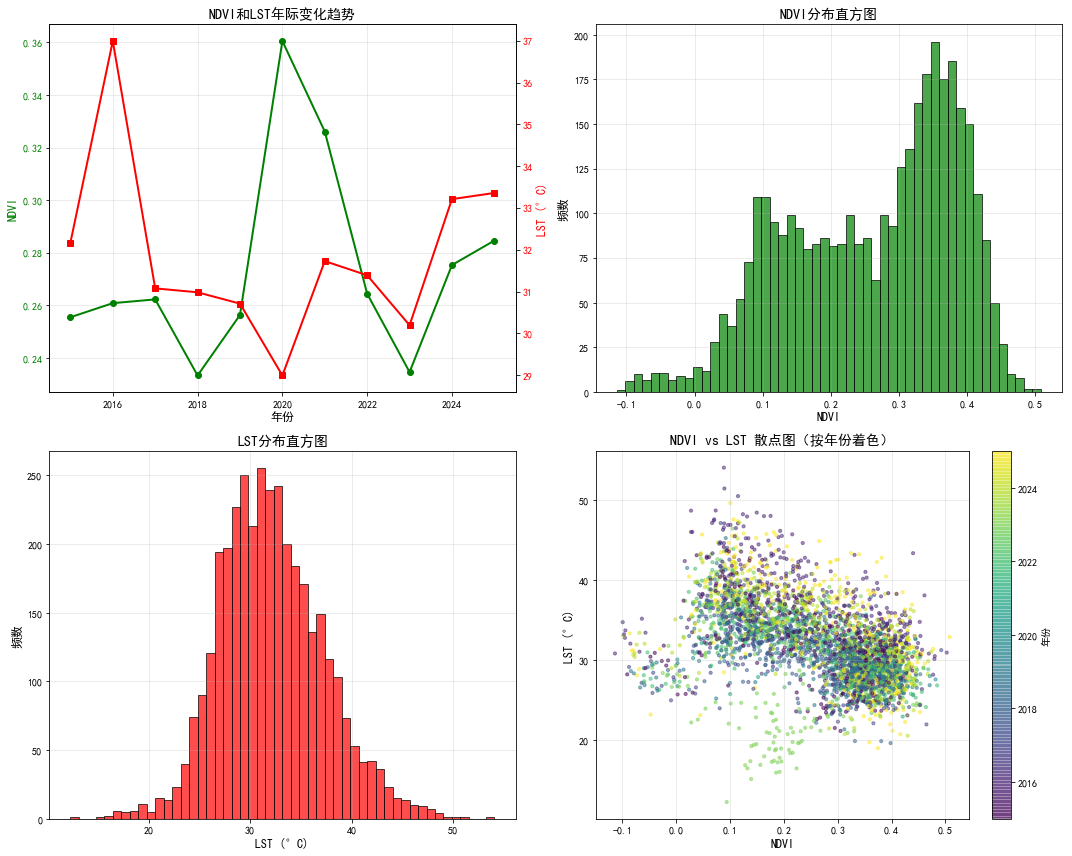

✅ 可视化图表已生成并保存为 '数据分析可视化.png'


In [20]:
# 创建可视化图表
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 图1：NDVI和LST的年际变化趋势
yearly_trend = df_features.groupby('year')[['NDVI', 'LST']].mean()
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()

ax1.plot(yearly_trend.index, yearly_trend['NDVI'], 'g-o', linewidth=2, label='NDVI')
ax1_twin.plot(yearly_trend.index, yearly_trend['LST'], 'r-s', linewidth=2, label='LST')

ax1.set_xlabel('年份', fontsize=12)
ax1.set_ylabel('NDVI', fontsize=12, color='g')
ax1_twin.set_ylabel('LST (°C)', fontsize=12, color='r')
ax1.set_title('NDVI和LST年际变化趋势', fontsize=14, fontweight='bold')
ax1.tick_params(axis='y', labelcolor='g')
ax1_twin.tick_params(axis='y', labelcolor='r')
ax1.grid(True, alpha=0.3)

# 图2：NDVI分布直方图
axes[0, 1].hist(df_features['NDVI'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('NDVI', fontsize=12)
axes[0, 1].set_ylabel('频数', fontsize=12)
axes[0, 1].set_title('NDVI分布直方图', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# 图3：LST分布直方图
axes[1, 0].hist(df_features['LST'], bins=50, color='red', alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('LST (°C)', fontsize=12)
axes[1, 0].set_ylabel('频数', fontsize=12)
axes[1, 0].set_title('LST分布直方图', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# 图4：NDVI vs LST散点图
scatter = axes[1, 1].scatter(df_features['NDVI'], df_features['LST'], 
                             c=df_features['year'], cmap='viridis', alpha=0.5, s=10)
axes[1, 1].set_xlabel('NDVI', fontsize=12)
axes[1, 1].set_ylabel('LST (°C)', fontsize=12)
axes[1, 1].set_title('NDVI vs LST 散点图（按年份着色）', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='年份')

plt.tight_layout()
plt.savefig('数据分析可视化.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ 可视化图表已生成并保存为 '数据分析可视化.png'")


In [21]:
# 保存数据csv文件
df_features.to_csv('cleaned_data.csv', index=False, encoding='utf-8-sig')
print('✅ cleaned_data.csv 文件已保存！')

# 假设您绘制了图表，保存图表PNG
plt.savefig('analysis_visualization.png', dpi=300, bbox_inches='tight')
print('✅ analysis_visualization.png 图片已保存！')


✅ cleaned_data.csv 文件已保存！
✅ analysis_visualization.png 图片已保存！


<Figure size 432x288 with 0 Axes>